# Julia bootcamp

A basic introduction to vectors, matrices, and plotting in Julia. This notebook will equip
you for exploring and visualizing the mathematics of symmetry. 

Instructions: 
  * step through the notebook
  * read the explanatory comments
  * read, execute, and try to understand the example code
  * try the activities
  * try your own variations on activities and example code
  
The notebook ends with three challenge activities that synthesize what you've learned.

Tech 411.05 *Patterns and Symmetry*, University of New Hampshire, fall 2024, J. Gibson


## Why Julia?

Julia is a open-source (free), general-purpose, language designed for math and speed. 

Julia has
  * the math focus of Matlab
  * the freedom, flexibility, and general-purpose capabilities of Python
  * the execution speed of C, C++, Fortran
  * the metaprogramming magic of LISP
  * best-of-breed packaging and version control
  
No other language combines these features.  

The downsides of Julia are
  * a young language, less widely used than Python, Matlab, C, or Fortran.
  * requires some disk space for packages
  * not currently installed on UNH computers (I'm working on this...)
  
However, Julia is very much on the rise, it is way easier and more sensible than alternatives,
people are doing and amazing things with it that are not possible in other languages. Julia is
the future of computational math!

## Julia notebooks

A Julia notebook is an interactive document that combines Julia code, text & graphical output, and math & text annotation.
Julia notebooks use the same Jupyter notebook technology as Python and R notebooks. 

The notebook consists of cells of three types: code, output, and text.

### Text cells

Text cells are written in a simple mark-up language called Markdown, with mathematical notation in LaTeX. Double-click this cell to see how the boldface headers, bullet lists, and the equation below are represented and edited in Markdown and LaTeX. 

\begin{equation}
\int \frac{1}{1+x^2} dx = \tan^{-1} x + c
\end{equation}

Then hit shift-enter to return the cell to display mode. You can edit the text before returning to display mode, if you like. The LaTeX typesetting allows for inline formulae, too, for example: $\cos^2(\theta) + \sin^2(\theta) = 1$.

### Code and text output cells

Below is a cell containing Julia code. Execute it by clicking on the cell and hitting shift-enter.

In [9]:
θ = range(0, 2π, length=11)

0.0:0.6283185307179586:6.283185307179586

After you execute a cell, the notebook prints the value of the last statement executed, here the value of θ. The value of θ here is the set of 11 evenly-space numbers from 0 to 2π, expressed in the form `start:step:stop`.

You can see all the numeric values in θ by converting the set to a vector with the `collect` function. Hit shift-enter on the code cell below to see.

In [11]:
collect(θ)

11-element Vector{Float64}:
 0.0
 0.6283185307179586
 1.2566370614359172
 1.8849555921538759
 2.5132741228718345
 3.141592653589793
 3.7699111843077517
 4.39822971502571
 5.026548245743669
 5.654866776461628
 6.283185307179586

### Code and graphical output cells

Here's some code that generates a plot of $\sin(x)$ and $\cos(x)$ over $0 \leq θ \leq 2\pi$. The `using Plots` line loads the plotting package. `plot(...)` starts a new plot, and `plot!(...)` adds to or revises the current plot. In a code cell like this with multiple lines (statements), Julia will execute the statements and then display the result of the last statement, here a plot.

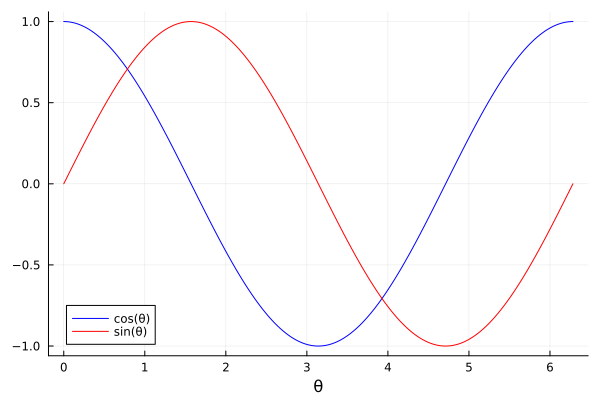

In [43]:
using Plots

θ = range(0, 2π, length=201)

plot(θ, cos.(θ), linecolor=:blue, label="cos(θ)")
plot!(θ, sin.(θ), linecolor=:red, label="sin(θ)")
plot!(xlabel="θ")

Note the . between `cos` and `(θ)` in the above code, and same for `sin`. This is "dot syntax" telling Julia to apply `cos` to each element of the vector of values in θ. You'll find a more detailed explanation of dot syntax
further on in this notebook. 

To switch a cell between text and code modes, click on the cell and use the `Cell -> Cell type` menu above
(there are also keyboard shortcuts for commonly used commands).

## Julia fundamentals: examples and activities

I'm going to show you Julia basics by example. After each example there's an activity for you to do.
By the end you should know enough to do basic math in Julia and to make interesting plots.

### 1. Greek letters and symbols

You enter Greek letters and symbol in Julia code cells like this: `\theta<TAB>` gives you θ. 
(That means type `\theta` then hit the TAB key.) 

**Activity:** Position the cursor after `\theta`, hit TAB, and watch it turn into `θ`.

In [ ]:
\theta

**Activity:** Try entering a Greek letter or math symbol of your choice in the cell below. 

### 2. Assigning variables

You assign a value to a variable like this 

In [37]:
x = 4.5

4.5

After excuting that statement, Julia remembers the value of `x` as 4.5.

In [38]:
x

4.5

**Activity:** Try setting the variable ϕ to π/2. (ϕ is pronounced "phi.")

### 3. Executing functions

Basic syntax of function execution in Julia is `y = f(x)`. That evaluates the function `f` on value `x` and assigns the result to `y`. 

**Activity:** Try executing the cell below (it'll work if you did the last activity correctly).

In [21]:
y = sin(ϕ)

1.0

### 4. Writing functions

Julia has several ways to write functions.

#### Simple one-liners

Define the function $f(x) = x^2 -3$ in one line:

In [112]:
f(x) = x^2 - 3

f (generic function with 1 method)

Evaluate $f(x)$ at $x=1$

In [24]:
f(1)

-2

#### Multiliners

Longer functions that require multiple steps can be defined with `function ... end`:

In [25]:
function g(x)
    y = 0
    for n = 0:5
        y = y + x^n
    end
    y
end

g (generic function with 1 method)

The value returned by a function is the value of the last statement executed, here `y`.

In [27]:
g(0.1)

1.11111

**Activity:** Write a function `nsum(n)` that returns the sum of the numbers 1 through n.

#### Maps a.k.a anonymous functions

You can also define functions as maps in the form `x -> some function of x`.
This syntax will be useful later. 

In [39]:
x -> x^2 - 3

#7 (generic function with 1 method)

The `x -> x^2 -3` function above was defined without a name, hence the term "anonymous function."
But you can assign that function to a name and evaluate it like a normal function as follows.

In [41]:
h = x -> x^2 - 3

#9 (generic function with 1 method)

In [42]:
h(1.0)

-2.0

**Activity:** Define these functions using three function definition methods shown above.

\begin{align*}
  F(x) &= x^2 - 2x -3 \\
  G(x) &= \cos(x/4) \\
  H(x) &= 1/x 
\end{align*}

**Activity:** Evaluate $F(1), G(\pi),$ and $H(0)$

### 5. Vectors: square-bracket,  colon, & dot syntax

Vectors are an extraordinarily important part of any computational mathematics system. 
Julia has several ways to define vectors.

**Explicit lists in square brackets**

Put a bunch of numbers separated by semicolons in square brackets.

In [44]:
x = [1.3; 2.2; 8]

3-element Vector{Float64}:
 1.3
 2.2
 8.0

**Colon syntax**

The syntax `start:stop` makes a set of numbers from `start` to `stop` in steps of 1. 
This syntax does not actually evaluate and store the complete vector until its used,
or until you convert it to an explicit vector with `collect`.

In [54]:
x = 3:7

3:7

In [60]:
collect(x)

5-element Vector{Int64}:
 3
 4
 5
 6
 7

The syntax `start:step:stop` does the same but in steps of `step` rather than 1.
The following constructs the integers from 4 to 22 in steps of 2, i.e. the even integers 
in that range.

In [62]:
4:2:22

4:2:22

In [63]:
collect(4:2:22)

10-element Vector{Int64}:
  4
  6
  8
 10
 12
 14
 16
 18
 20
 22

#### The range function

`range(start, stop, step=...)` does the same as `start:step:stop`

In [64]:
range(4,22, step=2)

4:2:22

In [65]:
collect(range(4,22, step=2))

10-element Vector{Int64}:
  4
  6
  8
 10
 12
 14
 16
 18
 20
 22

`range(start, stop, length=...)` makes a range of equally-spaced numbers from `start` to `stop`,
where `length` specifies how many equally-spaced numbers there should be

In [66]:
range(4, 22, 5)

4.0:4.5:22.0

In [67]:
collect(range(4, 22, 5))

5-element Vector{Float64}:
  4.0
  8.5
 13.0
 17.5
 22.0

**Activity:** Make a vector `y` of the even numbers from 0 to 6 using an explicit list in square brackets.

**Activity:** Make a vector `x` of odd numbers from 11 to 23.

 **Activity:** Make a vector `θ` of 100 evenly-spaced numbers from 0 to 2π.

### 6. Vectors: accessing individual elements

You can get or set the elements or components of a vector using square brackets and
integer indices. Here I'll create a vector of random elements (between 0 and 1) and
then access and reset individual elements with square brackets.

In [78]:
x = rand(7)

7-element Vector{Float64}:
 0.1560211254790438
 0.01860665223317648
 0.4827973709882363
 0.21243091828873872
 0.6158848371614893
 0.35135503732763873
 0.867073655029298

In [79]:
x[1]

0.1560211254790438

In [80]:
x[2]

0.01860665223317648

In [81]:
# set third component to zero
x[3] = 0

0

In [82]:
# view the modified vector
x

7-element Vector{Float64}:
 0.1560211254790438
 0.01860665223317648
 0.0
 0.21243091828873872
 0.6158848371614893
 0.35135503732763873
 0.867073655029298

### 7. Vectors: accessing multiple elements

Now the tricks begin! You can access or set multiple elements of a vector by using 
*sets of indices* in square brackets.

Let's set x to the range from 1.3 to 11.3 in steps of 1. I'll turn the range into
a vector of explicit number with `collect`.

In [85]:
x = collect(1.3:11.3)

11-element Vector{Float64}:
  1.3
  2.3
  3.3
  4.3
  5.3
  6.3
  7.3
  8.3
  9.3
 10.3
 11.3

That's 11 numbers, which we can confirm by checking the length of the vector.

In [87]:
length(x)

11

Now we can get the first three components of `x` by using a vector indices `[1; 2; 3]` within the square brackets.

In [92]:
x[[1; 2; 3]]

3-element Vector{Float64}:
 1.3
 2.3
 3.3

Or we can get the odd-numbered components using `[1; 3; 5; 7; 9; 11]` within the square brackets.

In [93]:
x[[1; 3; 5; 7; 9; 11]]

6-element Vector{Float64}:
  1.3
  3.3
  5.3
  7.3
  9.3
 11.3

**Activity:** Typing out all those numbers is a pain. So instead of typing out `[1; 2; 3]` and 
`[1; 3; 5; 7; 9; 11]` in those last examples, trying accessing the same elements using the colon
syntax covered above. 

In [94]:
# put colon syntax inside the square brackets to access elements 1 through 3
x[ ] 

LoadError: BoundsError: attempt to access 11-element Vector{Float64} at index []

In [ ]:
#put colon syntax inside the square brackets to access all the odd elements
x[ ] 

**Activity:** Get the elements of `x` in reverse order using a range with a negative step inside the square brackets.

In [ ]:
x[ ]

### 8. Dot syntax

Julia has all sorts of built-in elementary functions, like `sin`, `cos`, `exp` ($e^x$), `log`, etc.
And those work just like you'd expect them too. For example, you compute the value of $\tan(\theta)$ 
for some value of $\theta$ with ...

In [100]:
θ = π/4
tan(θ)

0.9999999999999999

...except that computer math has finite precision, so sometimes you don't get exactly the answer you'd expect.

We've seen how to make $\theta$ a vector containing a range of values over an interval, using colon syntax or the `range` function. So how do we compute the tangent of all the values in the vector $\theta$? Is it $\tan(\theta)$ when $\theta$ is a vector?

In [106]:
# not this way!

θ = collect(range(-π/4, π/4, length=128))
tan(θ)

LoadError: MethodError: no method matching tan(::Vector{Float64})

[0mClosest candidates are:
[0m  tan([31m::ComplexF16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1559[24m[39m
[0m  tan([31m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1558[24m[39m
[0m  tan([31m::IrrationalConstants.Fourπ[39m)
[0m[90m   @[39m [35mIrrationalConstants[39m [90m~/.julia/packages/IrrationalConstants/vp5v4/src/[39m[90m[4mtrigonometric.jl:27[24m[39m
[0m  ...


Yikes! That gives us an error message, which says that Julia cannot evaluate the tangent of a vector.

This makes perfect sense mathematically. The tangent is a *scalar function*, a function that maps real
numbers to real numbers (math notation $\tan : \mathbb{R} \rightarrow \mathbb{R}$). The tangent of a
vector is not defined in mathematics. Unlike some other languages (Matlab, Python, I'm looking at you!),
Julia follows mathematics carefully.

The way to evaluate $\tan(\theta)$ for a vector of values $\theta$ is with *dot syntax*. Put a period
(a dot) between the function `tan`and the argument `(θ)`. That tells Julia to apply the scalar function
`tan` to each element of `θ`, one-by-one, and return all the values in a vector of the same size as `θ`.

In [107]:
tan.(θ)

128-element Vector{Float64}:
 -0.9999999999999999
 -0.9755640394620313
 -0.9517107779538782
 -0.9284125745910348
 -0.905643392194411
 -0.8833786794416271
 -0.8615952631653983
 -0.8402712497905247
 -0.8193859350137993
 -0.7989197209299312
 -0.7788540398932822
 -0.759171284481419
 -0.7398547429936276
  ⋮
  0.759171284481419
  0.7788540398932822
  0.7989197209299312
  0.8193859350137993
  0.8402712497905247
  0.8615952631653983
  0.8833786794416271
  0.905643392194411
  0.9284125745910348
  0.9517107779538782
  0.9755640394620313
  0.9999999999999999

Yay! That's what we want.

The dot syntax works on user-defined functions as well as built-in functions.
Remember how we defined $f(x) = x^2 - 3$ above? Let's evaluate $f(x)$ over
a range of values between -1 and 1.

In [113]:
x = -1:.1:1
f.(x)

21-element Vector{Float64}:
 -2.0
 -2.19
 -2.36
 -2.5100000000000002
 -2.64
 -2.75
 -2.84
 -2.91
 -2.96
 -2.99
 -3.0
 -2.99
 -2.96
 -2.91
 -2.84
 -2.75
 -2.64
 -2.5100000000000002
 -2.36
 -2.19
 -2.0

The general idea of dot syntax is to tell Julia "do this operation elementwise." For example,

In [163]:
x = collect(-4:4)
y = x^2 

LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)

[0mClosest candidates are:
[0m  ^([31m::Float16[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1283[24m[39m
[0m  ^([31m::Regex[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mregex.jl:863[24m[39m
[0m  ^([31m::Float32[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1277[24m[39m
[0m  ...


doesn't work, because `x` is a vector and the square operation is not defined on vectors.

But `x.^2` tells Julia to compute the square of all the elements in the vector `x`.

In [164]:
x = collect(-4:4)
y = x.^2 

9-element Vector{Int64}:
 16
  9
  4
  1
  0
  1
  4
  9
 16

Similarly, `x + 1` is not defined if `x` is a vector:

In [165]:
x = collect(-4:4)
x + 1

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar

[0mClosest candidates are:
[0m  +(::Any, ::Any, [31m::Any[39m, [31m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  +([31m::Base.CoreLogging.LogLevel[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mlogging.jl:131[24m[39m
[0m  +([31m::Complex{Bool}[39m, ::Real)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:320[24m[39m
[0m  ...


If you want to add 3 to every element of `x`, use dot syntax:

In [166]:
x = collect(-4:4)
x .+ 3

9-element Vector{Int64}:
 -1
  0
  1
  2
  3
  4
  5
  6
  7

To evaluate a polynomial over a vector, sprinckle dot syntax as needed.

In [167]:
x = collect(-4:4)

y = x.^2 - 3x .+ 1

9-element Vector{Int64}:
 29
 19
 11
  5
  1
 -1
 -1
  1
  5

Note that dot are *not needed* for `3x`, because scalar-vector multiplication is perfectly well-defined in mathematics, nor for the subtraction `-` between the vectors `x.^2` and `3x`, because addition and subtraction 
on vectors of the same dimension is also perfectly well-defined in mathematics.

### 9. Matrices

#### Ways to construct matrices...

In [182]:
# with square brackets, with semicolons to separate rows
A = [1 2 3 ; 4 5 6 ; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [183]:
# "list comprehension"

A = [10i + j for i in 1:4, j in 1:3]

4×3 Matrix{Int64}:
 11  12  13
 21  22  23
 31  32  33
 41  42  43

In [184]:
# initialize a zero matrix 
A = zeros(4,4)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [185]:
# a matrix of normally-distributed random numbers
A = randn(3,3)

3×3 Matrix{Float64}:
  0.137309  -0.907152  1.31661
 -1.1531     0.558235  1.8789
  1.54841   -0.626586  0.305188

In [187]:
# fill a matrix with the value 2.5

A = fill(2.5, 4, 7)

4×7 Matrix{Float64}:
 2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5

#### Accessing elements of matrices

This is similar to vectors.

In [200]:
# make a matrix of random integers between -10 and 10
A = [rand(Int) % 10 for i in 1:3, j in 1:4]

3×4 Matrix{Int64}:
 7  9  -1  9
 6  4   6  3
 3  3   0  0

Matrices are index by row and column numbers. E.g. $A_{23}$ means the element in 
the 2nd row and 3rd column. Julia syntax for accessing $A_{23}$ is `A[2,3]`.

In [201]:
# access the 1,2 element of A, i.e. the element in the 1st row and 2nd column

A[2,3]

6

Like vectors, you can access parts of a matrix by using ranges within the square brackets.

In [196]:
# access elements in the 3rd row, columns 2 through 4
A[3, 2:4]

3-element Vector{Int64}:
  0
 -9
  3

**An important trick:** accessing *all* the elements in a given row or colums. To do this,
use a colon without any start or stop value!

In [198]:
# get the first column of A
A[:,1]

3-element Vector{Int64}:
  4
 -3
 -3

In [199]:
# get the second row of A
A[2,:]

4-element Vector{Int64}:
 -3
 -4
  0
  6

Often we use matrices to store the $x,y$ or $x,y,z$ values of many data points.


In [205]:
θ = 0:π/16:2π

C = [cos.(θ) sin.(θ)] 

33×2 Matrix{Float64}:
  1.0           0.0
  0.980785      0.19509
  0.92388       0.382683
  0.83147       0.55557
  0.707107      0.707107
  0.55557       0.83147
  0.382683      0.92388
  0.19509       0.980785
  6.12323e-17   1.0
 -0.19509       0.980785
 -0.382683      0.92388
 -0.55557       0.83147
 -0.707107      0.707107
  ⋮            
 -0.55557      -0.83147
 -0.382683     -0.92388
 -0.19509      -0.980785
 -1.83697e-16  -1.0
  0.19509      -0.980785
  0.382683     -0.92388
  0.55557      -0.83147
  0.707107     -0.707107
  0.83147      -0.55557
  0.92388      -0.382683
  0.980785     -0.19509
  1.0          -2.44929e-16

The matrix $C$ now represents a unit circle, with $\cos(\theta)$ in the first column `C[:,1]`,
and $\sin(\theta)$ in the second column `C[:,2]`.

It is often convenient to store $x,y$ values in rows rather than columns. To make `C` that way,
we can apply the *transpose* operator `'` to `C` and assign the result back into the same variable.

In [207]:
C = C'

2×33 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  0.980785  0.92388   0.83147  …   0.92388    0.980785   1.0
 0.0  0.19509   0.382683  0.55557     -0.382683  -0.19509   -2.44929e-16

Or we can construct `C` directly that way, by transposing the vectors `cos.(θ)` and `sin.(θ)`, 
turning them into row vectors, and then setting them as rows of `C`, spearated by a semicolon.

In [209]:
C = [cos.(θ)' ;  sin.(θ)']

2×33 Matrix{Float64}:
 1.0  0.980785  0.92388   0.83147  …   0.92388    0.980785   1.0
 0.0  0.19509   0.382683  0.55557     -0.382683  -0.19509   -2.44929e-16

Hooray! We are now ready to make plots!

### 10. Plotting

Julia has several plotting packages. The simplest and most widely-used is called `Plots`. 

The essential plotting function is `plot(x, y, <options>)`, where `x` and `y` are vectors of
$x$ and $y$ coordinates and `<options>` is a set of optional arguments to set things like line colors. 


#### Example: an xy plot
The following code loads the `Plots` package and plots $\tan(\theta)$ over $ -\pi \leq \theta \pi$,
with dashed lines indicate the asymptotes where $\tan(\theta)$ is undefined.

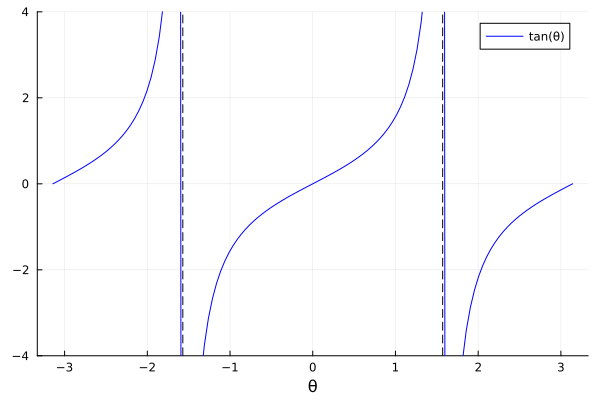

In [152]:
using Plots

θ = range(-π, π, length=128)
plot(θ, tan.(θ), linecolor=:blue, label="tan(θ)")

for θ in [-π/2; π/2]
    plot!([θ; θ], [-4; 4], linecolor=:black, linestyle=:dash, label="")
end
plot!(xlabel="θ", ylim=(-4,4))


#### Example: a logarithmic spiral

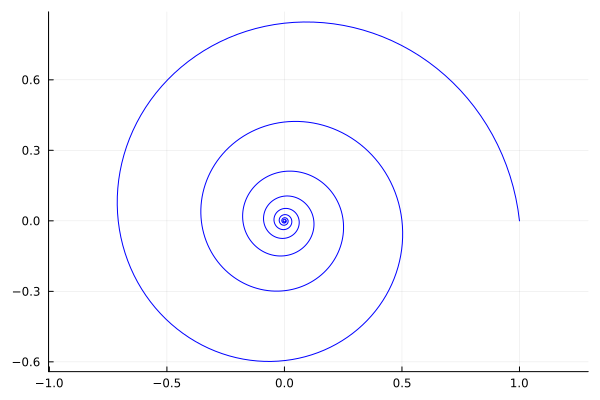

In [178]:
θ = range(0, 16π, length=1024)
r = (1/2).^(θ/2π)

plot(r.*cos.(θ), r.*sin.(θ), linecolor=:blue, label="")
plot!(aspect_ratio=:equal)


#### Example: a square rotated by π/4

We've covered all the ingredients of this plot except for the `scatter` function.

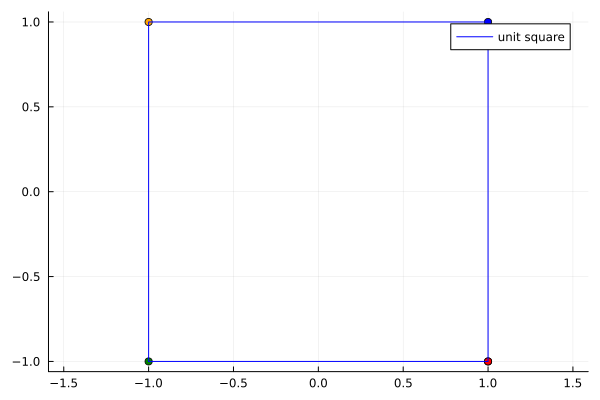

In [223]:
X = [1 1 -1 -1 1; -1 1 1 -1 -1]

scatter(X[1,:], X[2,:], label="", markercolor=[:red; :blue; :orange; :green; :red])
plot!(X[1,:], X[2,:], linecolor=:blue, label="unit square")
plot!(aspect_ratio = :equal)

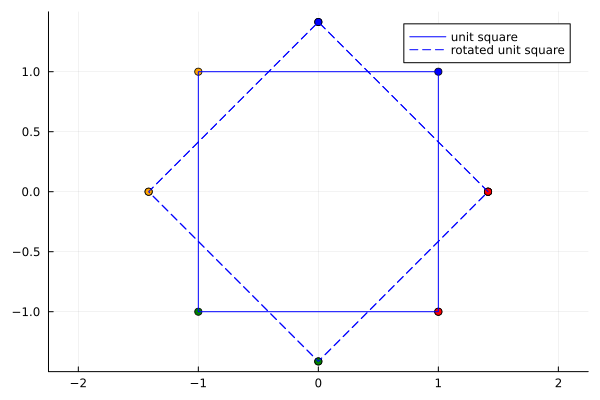

In [226]:
θ = π/4
R = [cos(θ) -sin(θ) ; sin(θ) cos(θ)]
RX = R*X

scatter!(RX[1,:], RX[2,:], label="", markercolor=[:red; :blue; :orange; :green; :red])
plot!(RX[1,:], RX[2,:], linecolor=:blue, linestyle=:dash, label="rotated unit square")

## Challenge activity

Make a plot of a unit pentagon and the same pentagon rotated by some angle.

## Challenge activity

Suppose the rows of a matrix $X$ store the $x,y$ coordinates of the vertices of a regular polygon.
Write a function `move(x, θ)` that shifts the polygon in the plane by the vector `x` and rotates
it by the angle θ. Then make a plot of a regular polygon in its original position and in a new, rotated
position. 

## Challenge activity

Make an interesting pattern of polygons using your `move` function!